In [142]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import math
from scipy.optimize import curve_fit

In [143]:
Hv = [50, -50, -100, 100, -150, 150, -200, 200, -250, 250, -300, 300 ]
Center = [1541, 1551, 1588, 1641, 1591, 1665, 1593, 1669, 1580, 1672, 1582, 1672 ]
Fwhm = [21.91, 20.04, 11.24, 14.87, 9.969, 13.11, 9.120, 10.93, 7.857, 12.10, 6.804, 8.845 ]
Resolution = np.array(Fwhm)/np.array(Center)


<ErrorbarContainer object of 3 artists>

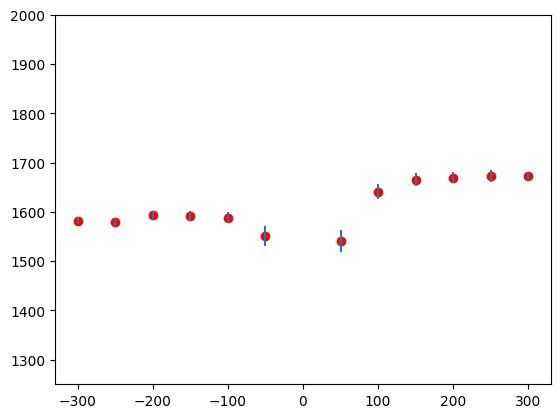

In [144]:
plt.scatter(Hv,Center, c = 'red')
plt.ylim(1250,2000)
plt.errorbar(Hv,Center,Fwhm,  linestyle='None')

[0.01421804 0.0129207  0.00707809 0.00906155 0.00626587 0.00787387
 0.00572505 0.00654883 0.00497278 0.00723684 0.00430088 0.00529007]


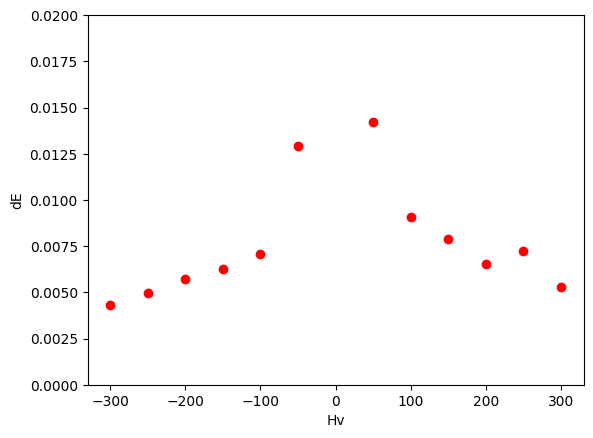

In [145]:
plt.scatter(Hv,Resolution, c = 'red')
plt.ylabel('dE')
plt.xlabel('Hv')
plt.ylim(0,0.02)
print(Resolution)

In [146]:
#Calibrazione MCA in energia

In [147]:
Canale = np.array([1496.09, 1595.22, 1690.23])
delta = np.array([7.85, 7.04, 7.95])
Energie = np.array([5.157, 5.486, 5.805])

In [148]:
def retta(x,a,b):
    return a*x + b

In [149]:
x = np.linspace(0,1800,400)


0.003337660782439549


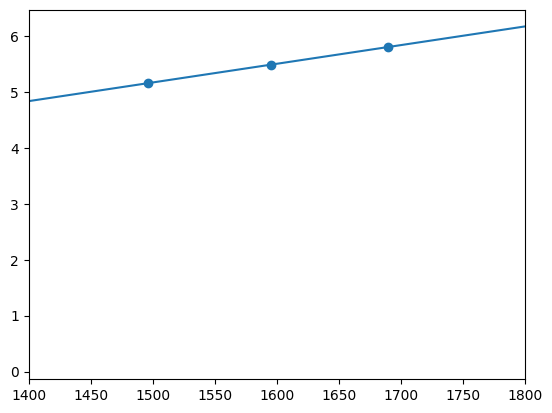

In [150]:
plt.scatter(Canale,Energie)
popt, pcov = opt.curve_fit(retta,Canale,Energie)
plt.plot(x, retta(x,popt[0], popt[1]))
plt.xlim(1400,1800)
print(popt[0])
plt.show()

In [151]:
Resolution_Am = delta/Canale
print(Resolution_Am)


[0.00524701 0.00441318 0.0047035 ]


In [152]:
print(popt[0])
print(popt[1])

0.003337660782439549
0.16294715411145708


In [153]:
#Picco Cesio 137 (aumento del gain di un fattore 5)
Energia_Cesio = popt[0]*876.40/5 + popt[1]
print(Energia_Cesio)

0.7479723360574613


In [154]:
Res_Pu = Resolution_Am[0]*5.157
print(Res_Pu)

0.027058833358955682


In [155]:
from scipy.optimize import curve_fit

In [156]:
Mca = np.linspace(0,2048,2048)
def gaussiana(x, a, mu, sigma):
    return a * np.exp(-((x - mu)**2) / (2 * sigma**2))
def somma_gauss(x,a1,mu1,sigma1,a2,mu2,sigma2):
    return gaussiana(x,a1,mu1,sigma1) + gaussiana(x,a2,mu2,sigma2)
def somma_gauss3(x,a1,mu1,sigma1,a2,mu2,sigma2,a3,mu3,sigma3):
    return gaussiana(x,a1,mu1,sigma1) + gaussiana(x,a2,mu2,sigma2) + gaussiana(x,a3,mu3,sigma3)
def sigmoide(x, L, x0, k, C):
    return C +  L / (1 + np.exp((x - x0)/-k)) 

In [157]:
import pandas as pd
import numpy as np
import scipy.stats as st
import landaupy

def leggi_da_excel(file_excel, foglio_excel):
    # Leggi i dati dal foglio Excel
    dati_excel = pd.read_excel(file_excel, sheet_name=foglio_excel)
    
    # Converti i dati in una matrice (lista di liste)
    matrice_dati = dati_excel.values.tolist()
    
    return matrice_dati

# Percorso del file Excel
file_excel = r"Plutonio.xlsx"
# Nome del foglio Excel da cui leggere i dati
foglio_excel = "Foglio1"

# Chiamata alla funzione per leggere i dati e metterli in una matrice
matrice_dati = leggi_da_excel(file_excel, foglio_excel)

# Stampare la matrice per verificare che i dati siano stati letti correttamente
print(matrice_dati)

[['Spettro Tripla', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

(1550.0, 1650.0)

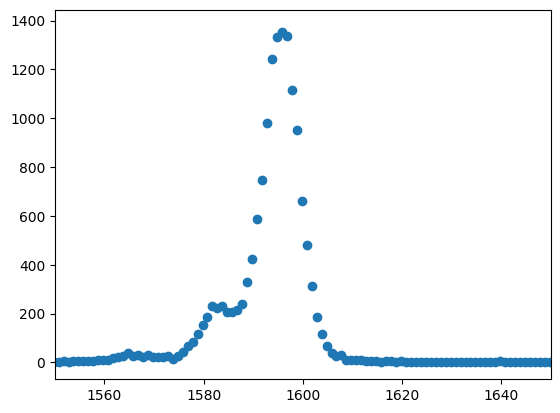

In [158]:
plt.scatter(Mca,matrice_dati[1])
plt.xlim(1550,1650)

In [159]:
y = np.array(matrice_dati[1])
x_min = 1550
x_max = 1650
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([1400,1590,7])
popt, pcov = curve_fit(gaussiana,x_fit,y_fit,p0)

1595.4679832411794
3.84860412050855


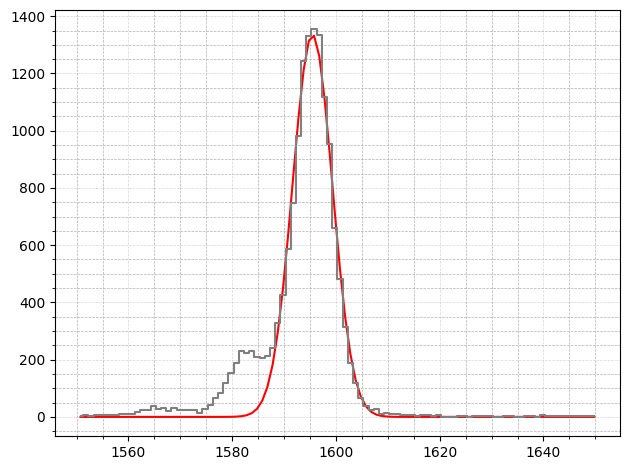

In [160]:
plt.plot(x_fit,gaussiana(x_fit,popt[0],popt[1],popt[2]), c='red')
#plt.scatter(x_fit,y_fit)
print(popt[1])
print(popt[2])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray', label='Spettro $^{22}$Na')

In [182]:
y = np.array(matrice_dati[1])
x_min = 1550
x_max = 1650
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([1400,1590,7,200,1580,7,20,1565,1])
popt, pcov = curve_fit(somma_gauss3,x_fit,y_fit,p0)


1583.409551426139
3.7239021551911744


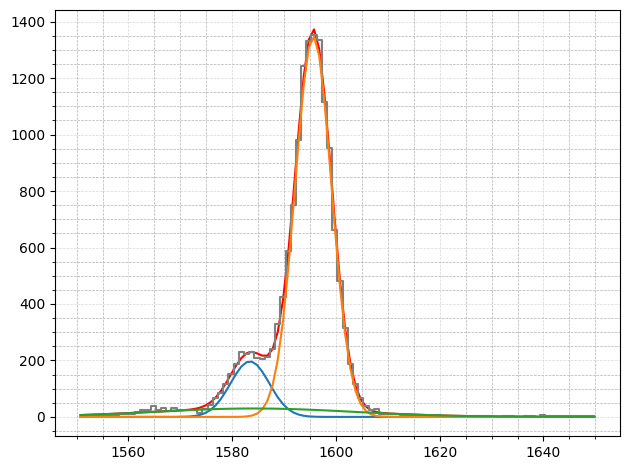

In [183]:
plt.plot(x_fit,somma_gauss3(x_fit,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6],popt[7],popt[8]), c='red')
#plt.scatter(x_fit,y_fit)
print(popt[1])
print(popt[2])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray', label='Spettro $^{22}$Na')
plt.plot(x_fit,gaussiana(x_fit,popt[0],popt[1],popt[2]))
plt.plot(x_fit,gaussiana(x_fit,popt[3],popt[4],popt[5]))
plt.plot(x_fit,gaussiana(x_fit,popt[6],popt[7],popt[8]))

(1450.0, 1550.0)

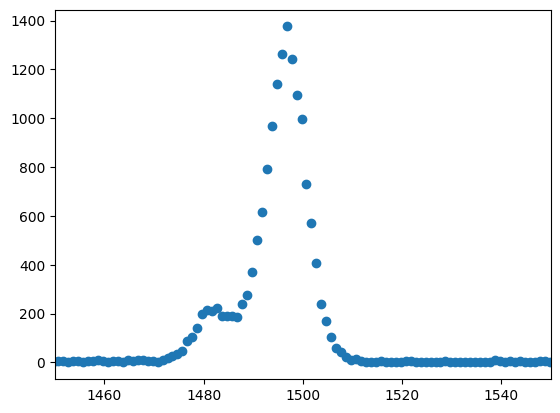

In [163]:
plt.scatter(Mca,matrice_dati[1])
plt.xlim(1450,1550)

In [164]:
y = np.array(matrice_dati[1])
x_min = 1450
x_max = 1550
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([1400,1490,7,200,1480,7])
popt, pcov = curve_fit(somma_gauss,x_fit,y_fit,p0)

1496.6642177832994
3.949283634939274


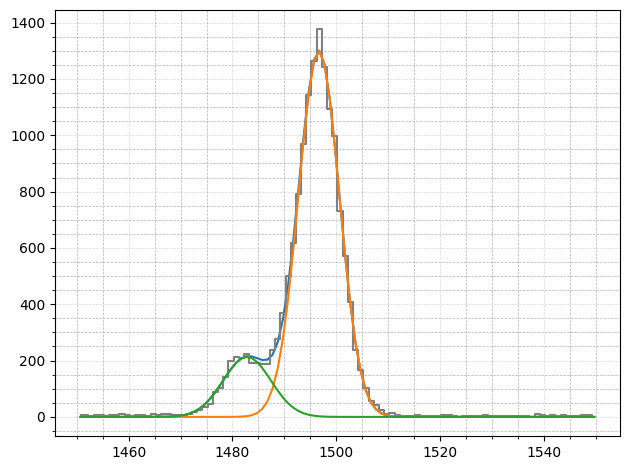

In [165]:
plt.plot(x_fit,somma_gauss(x_fit,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]))
#plt.scatter(x_fit,y_fit)
print(popt[1])
print(popt[2])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray', label='Spettro $^{22}$Na')
plt.plot(x_fit,gaussiana(x_fit,popt[0],popt[1],popt[2]))
plt.plot(x_fit,gaussiana(x_fit,popt[3],popt[4],popt[5]))

(1650.0, 1750.0)

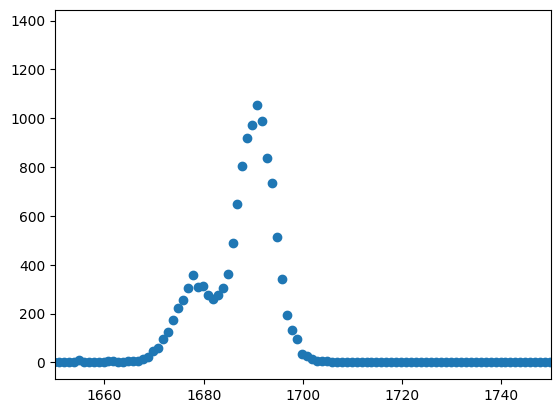

In [166]:
plt.scatter(Mca,matrice_dati[1])
plt.xlim(1650,1750)

In [167]:
y = np.array(matrice_dati[1])
x_min = 1650
x_max = 1750
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = y[mask]
p0 = np.array([1400,1690,7,400,1675,7])
popt, pcov = curve_fit(somma_gauss,x_fit,y_fit,p0)

1690.579228005592
3.598826762281036


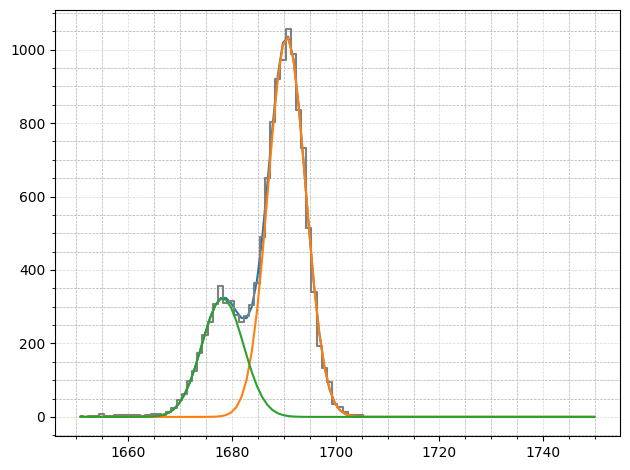

In [168]:
plt.plot(x_fit,somma_gauss(x_fit,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]))
#plt.scatter(x_fit,y_fit)
print(popt[1])
print(popt[2])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray', label='Spettro $^{22}$Na')
plt.plot(x_fit,gaussiana(x_fit,popt[0],popt[1],popt[2]))
plt.plot(x_fit,gaussiana(x_fit,popt[3],popt[4],popt[5]))

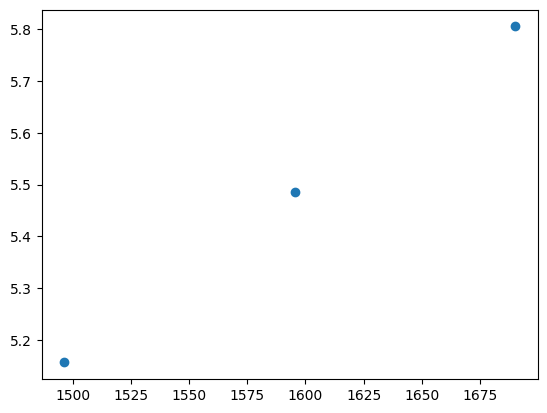

In [169]:
Canali = np.array([1496.46, 1595.46, 1690.06])
plt.scatter(Canali,Energie)

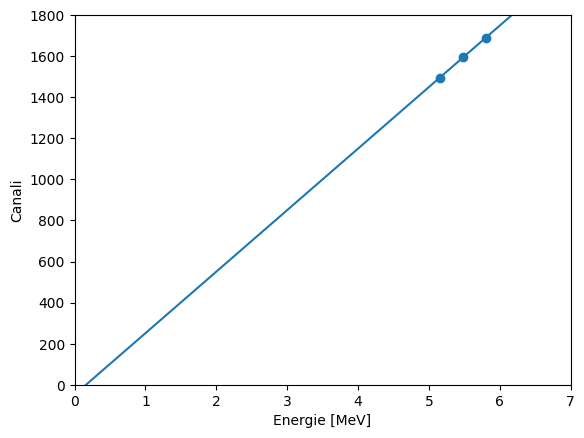

The function is the type Channel = Eenergy*a + b
parameter a for the line is = 299.60768700086345
parameter b for the line is = -48.802412558581295
error on parameter a is = 1.0013847192728274
error on parameter b is = 5.496647029894052


In [ ]:
plt.scatter(Energie, Canale)
Energie_plot = np.linspace(0,7,100)
popt, pcov = opt.curve_fit(retta, Energie, Canale)
plt.plot(Energie_plot, retta(Energie_plot, popt[0], popt[1]))
#plt.xlim(min(Canale) - 50, max(Canale) + 50)
#plt.ylim(min(Energie)- 0.5, max(Energie)+0.5)
#plt.xlim(0,1800)
plt.xlabel('Energie [MeV]')
plt.ylabel('Canali')
#plt.ylim(0,7)
plt.ylim(0,1800)
plt.xlim(0,7)
plt.show()
error_a = math.sqrt(pcov[0][0])
error_b = math.sqrt(pcov[1][1])
print('The function is the type Channel = Eenergy*a + b')
print('parameter a for the line is =', popt[0])
print('parameter b for the line is =', popt[1])
print('error on parameter a is =', error_a)
print('error on parameter b is =', error_b)

(0.0, 700.0)

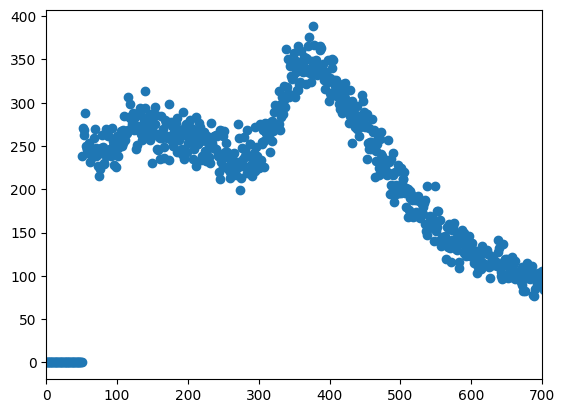

In [171]:
plt.scatter(Mca,matrice_dati[7])
#plt.ylim(0,100)
plt.xlim(0,700)

In [172]:
#Sorgente Na22


(0.0, 100.0)

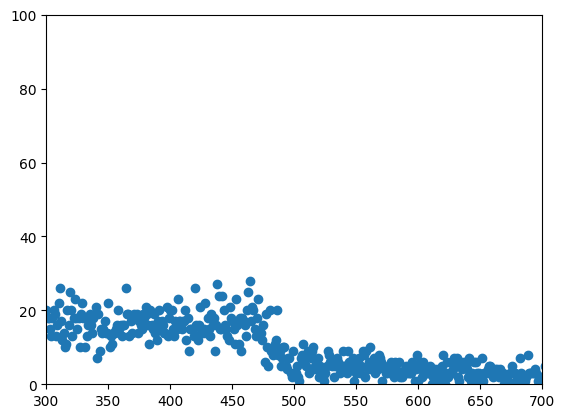

In [173]:
plt.scatter(Mca,matrice_dati[5])
sodio_schermato = np.array(matrice_dati[5])
sodio = np.array(matrice_dati[3])
plt.xlim(300,700)
plt.ylim(0,100)

In [194]:

x_min = 400
x_max = 600
mask = (Mca >= x_min) & (Mca <= x_max)
x_fit = Mca[mask]
y_fit = sodio_schermato[mask]
p0 = np.array([20,470,10,0])
popt, pcov = curve_fit(sigmoide,x_fit,y_fit,p0)

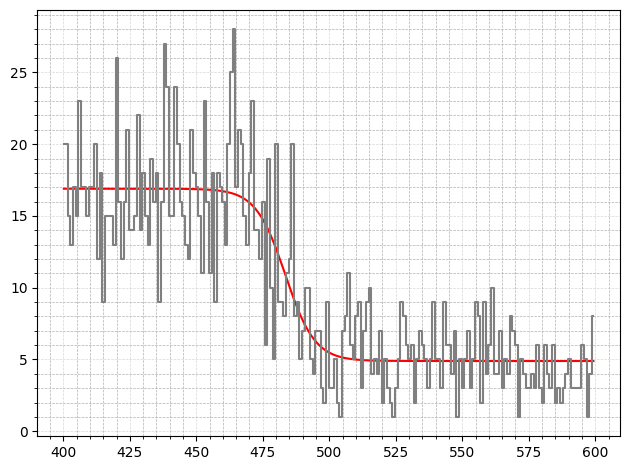

In [195]:
plt.plot(x_fit,sigmoide(x_fit,popt[0],popt[1],popt[2],popt[3]), c='red')
#plt.scatter(x_fit,y_fit)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(x_fit, y_fit, drawstyle='steps-mid', color='gray', label='Spettro $^{22}$Na')

In [176]:
#Calibrazione Cesio


In [177]:
Energy_cesio = np.array([0.624, 0.656])
channel = np.array([879.649, 925.449])
channel_err = np.array([13.3, 14.7])


In [178]:
popt, pcov = curve_fit(retta,channel,Energy_cesio)

C:\Users\ACER\AppData\Local\Temp\ipykernel_17352\189080023.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(retta,channel,Energy_cesio)


0.0006986899563318787